<h2>EDA YELP</h2>

Carga de datos originales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [2]:
df_business = pd.read_pickle(r'C:\HENRY\PROYECTOS HENRY 11\PROYECTO GRUPAL\Datasets\business.pkl')
df_checkin = pd.read_json(r'C:\HENRY\PROYECTOS HENRY 11\PROYECTO GRUPAL\Datasets\checkin.json', lines=True)
df_tip = pd.read_json(r'C:\HENRY\PROYECTOS HENRY 11\PROYECTO GRUPAL\Datasets\tip.json', lines=True)
df_user = pd.read_parquet(r'C:\HENRY\PROYECTOS HENRY 11\PROYECTO GRUPAL\Datasets\user.parquet')


In [3]:
df_review = pd.read_parquet(r'C:\HENRY\PROYECTOS HENRY 11\PROYECTO GRUPAL\Datasets\df_review.parquet')

<h2>BUSINESS</h2>

In [21]:
df_business.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Eliminar columnas duplicadas 
df_business = df_business.loc[:, ~df_business.columns.duplicated()]

In [23]:
#Conteo de columnas duplicadas
df_business.columns.duplicated().sum()

np.int64(0)

In [24]:
df_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [25]:
df_business.shape

(150346, 14)

In [26]:
df_business['city'].nunique()

1416

In [27]:
#Cantidad de business por cada ciudad
business_counts = df_business['city'].value_counts()

In [28]:
# Contar la cantidad de negocios por cada ciudad 
business_counts = df_business['city'].value_counts()
# Calcular el porcentaje del total para cada ciudad 
total_business = business_counts.sum() 
business_porcentaje = (business_counts / total_business) * 100 
business_porcentaje =business_porcentaje.round(2)
# Crear un DataFrame con el conteo y el porcentaje 
business_city = pd.DataFrame({ 'Count': business_counts, 'Porcentaje': business_porcentaje }) 
# Verificar el DataFrame 
print(business_city)

                   Count  Porcentaje
city                                
Philadelphia       14569        9.69
Tucson              9250        6.15
Tampa               9050        6.02
Indianapolis        7540        5.02
Nashville           6971        4.64
...                  ...         ...
East Norriton          1        0.00
Hernando Bch           1        0.00
WILLOW GROVE           1        0.00
Monchanin              1        0.00
Wesley Chapel  FL      1        0.00

[1416 rows x 2 columns]


In [29]:
# 15 ciudades con más business
top_15_cities = business_city.head(15)
top_15_cities

,Count,Porcentaje
city,,
Philadelphia,14569,9.69
Tucson,9250,6.15
Tampa,9050,6.02
Indianapolis,7540,5.02
Nashville,6971,4.64
New Orleans,6209,4.13
Reno,5935,3.95
Edmonton,5054,3.36
Saint Louis,4827,3.21


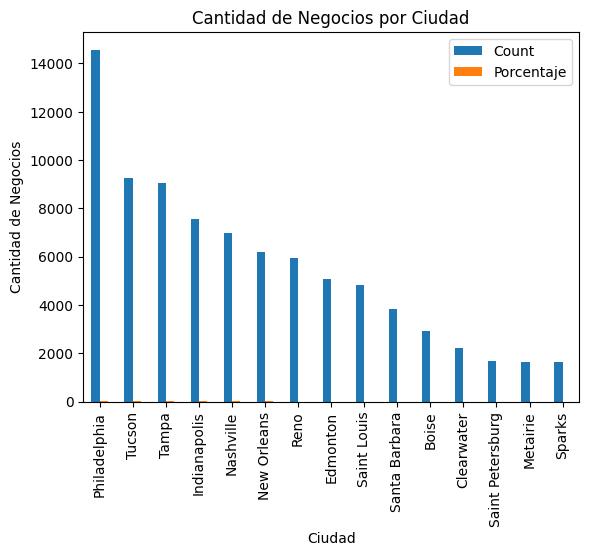

In [30]:
# Crear el diagrama de barras 
top_15_cities.plot(kind='bar') 
# Añadir títulos y etiquetas 
plt.title('Cantidad de Negocios por Ciudad') 
plt.xlabel('Ciudad') 
plt.ylabel('Cantidad de Negocios') 
# Mostrar el gráfico 
plt.show()

In [31]:
#Mostrar algunas categorias para analizar su estructura
df_business['categories'].head(10)

0    Doctors, Traditional Chinese Medicine, Naturop...
1    Shipping Centers, Local Services, Notaries, Ma...
2    Department Stores, Shopping, Fashion, Home & G...
3    Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                            Brewpubs, Breweries, Food
5    Burgers, Fast Food, Sandwiches, Food, Ice Crea...
6    Sporting Goods, Fashion, Shoe Stores, Shopping...
7                  Synagogues, Religious Organizations
8    Pubs, Restaurants, Italian, Bars, American (Tr...
9    Ice Cream & Frozen Yogurt, Fast Food, Burgers,...
Name: categories, dtype: object

Cada business contiene varias categorías

<h3>Conteo de palabras en categories</h3>

In [32]:
# Reemplazar valores None con cadenas vacías 
df_business['categories'] = df_business['categories'].fillna('')

# Concatenar todas las categorías en una sola cadena de texto 
all_categories = ', '.join(df_business['categories']) 
# Dividir la cadena en palabras individuales 
words = all_categories.split(', ') 
# Contar la frecuencia de cada palabra 
word_counts = Counter(words) 
# Mostrar las palabras más comunes 
common_words = word_counts.most_common() 
print(common_words)

[('Restaurants', 52268), ('Food', 27781), ('Shopping', 24395), ('Home Services', 14356), ('Beauty & Spas', 14292), ('Nightlife', 12281), ('Health & Medical', 11890), ('Local Services', 11198), ('Bars', 11065), ('Automotive', 10773), ('Event Planning & Services', 9895), ('Sandwiches', 8366), ('American (Traditional)', 8139), ('Active Life', 7687), ('Pizza', 7093), ('Coffee & Tea', 6703), ('Fast Food', 6472), ('Breakfast & Brunch', 6239), ('American (New)', 6097), ('Hotels & Travel', 5857), ('Home & Garden', 5799), ('Fashion', 5739), ('Burgers', 5636), ('Arts & Entertainment', 5434), ('Auto Repair', 5433), ('Hair Salons', 5046), ('Nail Salons', 4621), ('Mexican', 4600), ('Italian', 4573), ('Specialty Food', 4233), ('Doctors', 3763), ('Pets', 3758), ('Real Estate', 3577), ('Seafood', 3539), ('Fitness & Instruction', 3293), ('Professional Services', 3270), ('Hair Removal', 3239), ('Desserts', 3186), ('Chinese', 3169), ('Bakeries', 3150), ('Grocery', 3139), ('Salad', 3064), ('Hotels', 2977)

C:\Users\diani\AppData\Local\Temp\ipykernel_21544\2298396575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business['categories'] = df_business['categories'].fillna('')


In [33]:
categorias = pd.DataFrame(common_words)
# Nombrar las columnas 
categorias.columns = ['Category', 'Count']
categorias.head(20).sort_values(by='Count', ascending=False)

,Category,Count
0,Restaurants,52268
1,Food,27781
2,Shopping,24395
3,Home Services,14356
4,Beauty & Spas,14292
5,Nightlife,12281
6,Health & Medical,11890
7,Local Services,11198
8,Bars,11065
9,Automotive,10773


In [34]:
len(categorias)

1312

In [35]:
# Filtrar DataFrame para categorías que contienen la palabra 'Restaurant' Y 'food'
df_restaurants = df_business[df_business['categories'].str.contains('restaurant', case=False, na=False)]
#Filtrar los registros que contienen 'Food' de los restaurant
df_restaurants = df_business[df_business['categories'].str.contains('food', case=False, na=False)]

print(len(df_restaurants))


35919


In [36]:
# Contar la cantidad de restaurantes por ciudad 
restaurant_counts = df_restaurants['city'].value_counts()
restaurant_count = restaurant_counts.head(20)
restaurant_count = pd.DataFrame(restaurant_count).reset_index()
restaurant_count = pd.DataFrame(restaurant_count)
restaurant_count.columns = ['City', 'Count']
restaurant_count

,City,Count
0,Philadelphia,3756
1,Tampa,2184
2,Indianapolis,1953
3,Tucson,1854
4,New Orleans,1691
5,Nashville,1672
6,Edmonton,1370
7,Reno,1046
8,Saint Louis,968
9,Santa Barbara,672


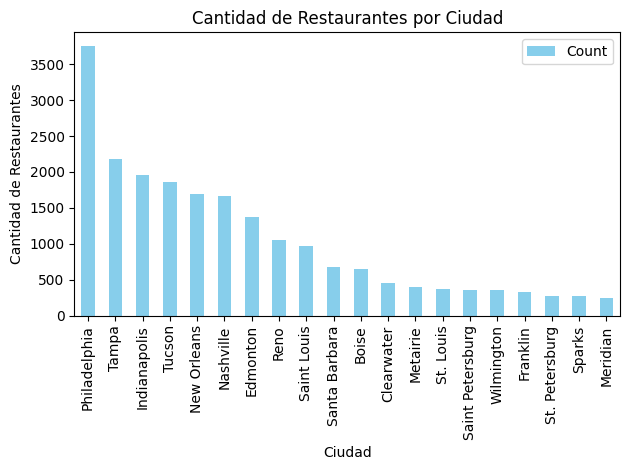

In [37]:

# Crear el diagrama de barras
ax = restaurant_count.plot(kind='bar', color='skyblue', x='City', y='Count')

# Añadir títulos y etiquetas
ax.set_title('Cantidad de Restaurantes por Ciudad')
ax.set_xlabel('Ciudad')
ax.set_ylabel('Cantidad de Restaurantes')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


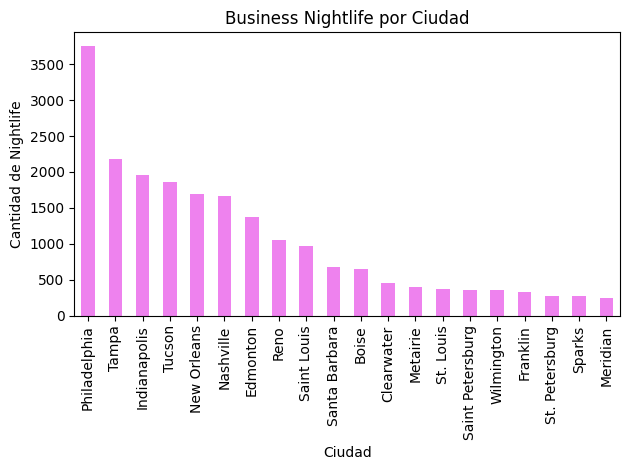

In [38]:
df_Nightlife = df_business[df_business['categories'].str.contains('Nightlife', case=False, na=False)]
Nightlife_counts = df_restaurants['city'].value_counts()
Nightlife_count = Nightlife_counts.head(20)
# Crear el diagrama de barras
ax = Nightlife_count.plot(kind='bar', color='violet', x='City', y='Count')

# Añadir títulos y etiquetas
ax.set_title('Business Nightlife por Ciudad')
ax.set_xlabel('Ciudad')
ax.set_ylabel('Cantidad de Nightlife')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

C:\Users\diani\AppData\Local\Temp\ipykernel_21544\2986980536.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=star_counts.index, y=star_counts.values, palette='viridis')


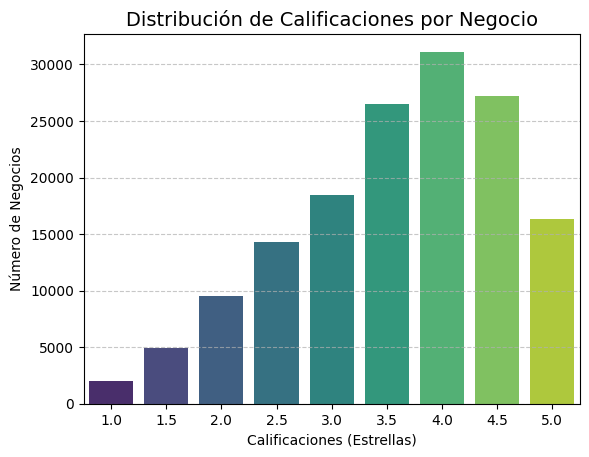

In [39]:

# Agrupamos los datos para contar cuántos negocios tienen cada nivel de calificación
star_counts = df_business['stars'].value_counts().sort_index()

# Crear el gráfico de barras
#plt.figure(figsize=(10, 6))
sns.barplot(x=star_counts.index, y=star_counts.values, palette='viridis')

# Personalizar el gráfico
plt.title('Distribución de Calificaciones por Negocio', fontsize=14)
plt.xlabel('Calificaciones (Estrellas)', fontsize=10)
plt.ylabel('Número de Negocios', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


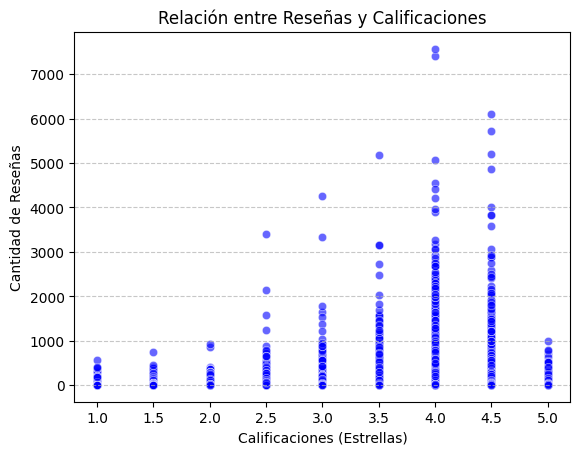

In [40]:
# Crear el gráfico de dispersión
#plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_business, x='stars', y='review_count', alpha=0.6, color='blue')

# Personalizar el gráfico
plt.title('Relación entre Reseñas y Calificaciones', fontsize=12)
plt.xlabel('Calificaciones (Estrellas)', fontsize=10)
plt.ylabel('Cantidad de Reseñas', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Mostrar el gráfico
plt.show()

<h2>REVIEWS</h2>

In [41]:
# Calcular la suma total de cada interacción
interaction_totals = df_review[['useful', 'funny', 'cool']].sum()
interaction_totals

useful    8280748
funny     2282743
cool      3485476
dtype: int64

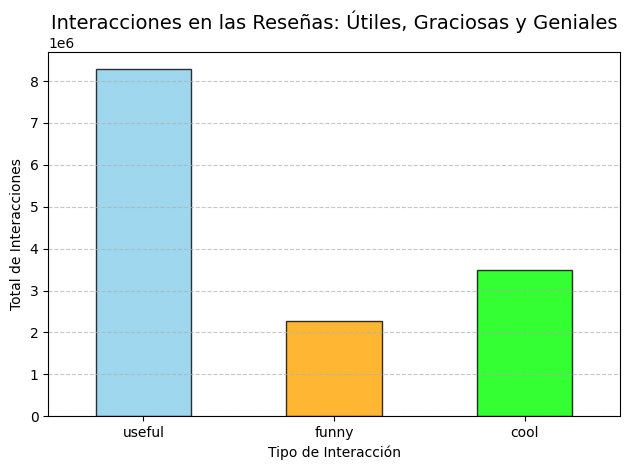

In [42]:
# Crear el gráfico de barras

interaction_totals.plot(kind='bar', color=['skyblue', 'orange', 'lime'], alpha=0.8, edgecolor='black')

# Personalizar el gráfico
plt.title('Interacciones en las Reseñas: Útiles, Graciosas y Geniales', fontsize=14)
plt.ylabel('Total de Interacciones', fontsize=10)
plt.xlabel('Tipo de Interacción', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [43]:
df_review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [56]:
#Tendencia de reviews por años
# Crear una columna con el año
df_review['year'] = df_review['date'].dt.year
# Agrupar por año y contar la cantidad de reseñas
reviews_per_year = df_review.groupby('year').size().reset_index(name='review_count')

# Ordenar por año (opcional)
reviews_per_year = reviews_per_year.sort_values('year')
print(reviews_per_year)

    year  review_count
0   2005           854
1   2006          3853
2   2007         15363
3   2008         48226
4   2009         74387
5   2010        138587
6   2011        230813
7   2012        286570
8   2013        383950
9   2014        522275
10  2015        688415
11  2016        758882
12  2017        820048
13  2018        906362
14  2019        907284
15  2020        554557
16  2021        618189
17  2022         31665


Gráfica de Cantidad de reseñas por año

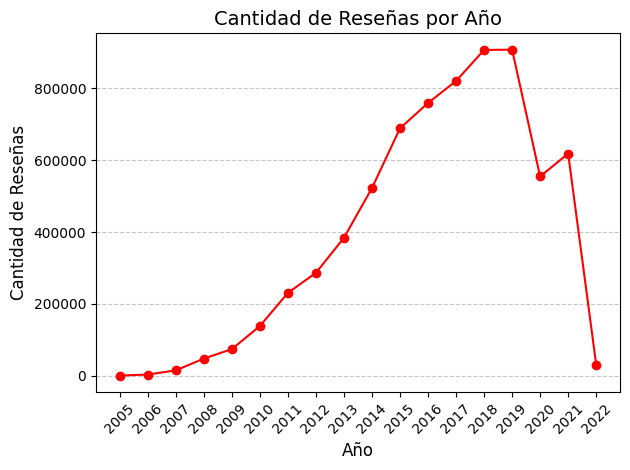

In [70]:
# Convertir la columna 'year' a enteros
reviews_per_year['year'] = reviews_per_year['year'].astype(int)

# Crear el gráfico de líneas con matplotlib 
#plt.figure(figsize=(10, 6)) 
plt.plot(reviews_per_year['year'], reviews_per_year['review_count'], marker='o', color='r') 
# Personalización 
plt.title('Cantidad de Reseñas por Año', fontsize=14) 
plt.xlabel('Año', fontsize=12) 
plt.ylabel('Cantidad de Reseñas', fontsize=12) 
plt.xticks(reviews_per_year['year'], rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
# Mostrar el gráfico 
plt.show()
